<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/mid_term_bitlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git


Cloning into 'bitlabs-project'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 589.99 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import IsolationForest
df = pd.read_csv('/content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv')


In [ ]:
#inkonsisten

# Memeriksa nilai unik di kolom teks tertentu untuk melihat inkonsistensi
for col in df_cleaned.select_dtypes(include='object'):
    print(f"Unique values in {col}: {df_cleaned[col].unique()[:5]}")  # Tampilkan hanya 5 pertama



Unique values in hotel: ['resort hotel' 'city hotel']
Unique values in arrival_date_month: ['july' 'august' 'september' 'october' 'november']
Unique values in meal: ['bb' 'fb' 'hb' 'sc' 'undefined']
Unique values in country: ['prt' 'gbr' 'usa' 'esp' 'irl']
Unique values in market_segment: ['direct' 'corporate' 'online ta' 'offline ta/to' 'complementary']
Unique values in distribution_channel: ['direct' 'corporate' 'ta/to' 'undefined' 'gds']
Unique values in reserved_room_type: ['c' 'a' 'd' 'e' 'g']
Unique values in assigned_room_type: ['c' 'a' 'd' 'e' 'g']
Unique values in deposit_type: ['no deposit' 'refundable' 'non refund']
Unique values in customer_type: ['transient' 'contract' 'transient-party' 'group']
Unique values in reservation_status: ['check-out' 'canceled' 'no-show']
Unique values in reservation_status_date: ['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22']
Unique values in name: ['ernest barnes' 'andrea baker' 'rebecca parker' 'laura murray'
 'linda hines'

In [33]:
# Missing Values

# Mengganti NaN dengan median untuk semua kolom numerik
numeric_df = df.select_dtypes(include=['number']) # Seleksi kolom numerik saja
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median()) # Isi NaN pada kolom numerik dengan median

# Mengganti NaN di kolom kategorikal dengan "unknown"
categorical_df = df.select_dtypes(include=['object'])  # Seleksi kolom kategorikal
df[categorical_df.columns] = df[categorical_df.columns].fillna('unknown')  # Isi NaN pada kolom kategorikal dengan 'unknown'

# Memeriksa jumlah NaN setelah penggantian
print(f"Jumlah NaN setelah penggantian: {df.isnull().sum().sum()}")

# Menyimpan dataset yang telah dibersihkan kembali ke Google Drive
df.to_csv('/content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv', index=False)



Jumlah NaN setelah penggantian: 0


In [37]:
duplicates = df[df.duplicated()]

print(duplicates)



Empty DataFrame
Columns: [Unnamed: 0, hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card, is_valid_date, is_last_minute, anomaly, timestamp]
Index: []

[0 rows x 41 columns]


In [35]:
num_duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi: {num_duplicates}")


Jumlah duplikasi: 0


In [44]:
#4.1
# Filter data dengan is_canceled == 1
df_canceled = df[df['is_canceled'] == 1]

# Hitung total lead_time dan jumlah data yang dibatalkan
total_lead_time = df_canceled['lead_time'].sum()
total_canceled = len(df_canceled)

# Hitung rasio
if total_canceled > 0:
    rasio = total_lead_time / total_canceled
else:
    rasio = 0

print(f"Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: {rasio}")


Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: 80.92102731539515


hotel               City Hotel  Resort Hotel
arrival_date_month                          
April               107.532309     82.394019
August              110.737816    151.833863
December             91.873571     75.235906
February             88.228268     67.841937
January              86.968950     63.536091


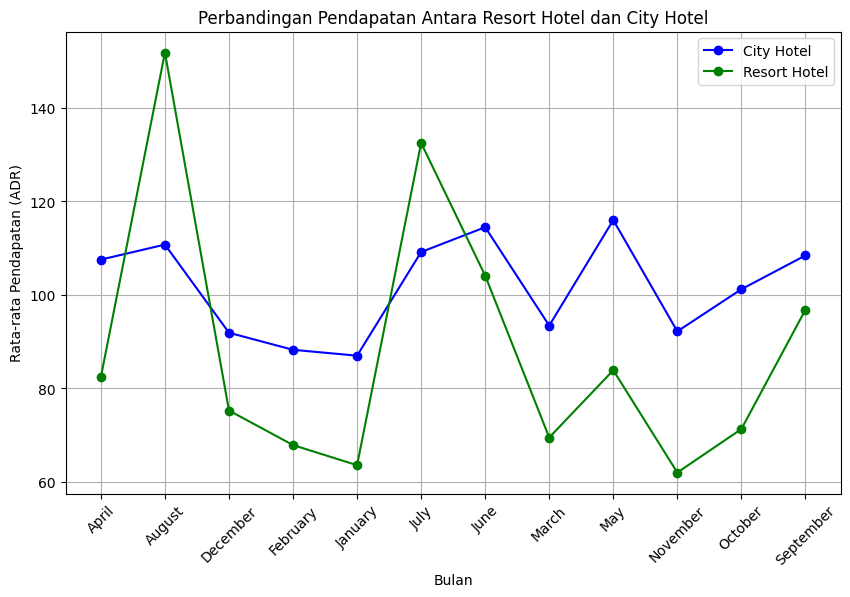

In [43]:
#4.2

# Mengelompokkan data berdasarkan tipe hotel dan bulan
monthly_revenue = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack()

# Pastikan data sudah benar
print(monthly_revenue.head())  # Ini untuk melihat apakah hasilnya sesuai

# Membuat line chart
plt.figure(figsize=(10, 6))

# Plot untuk setiap tipe hotel
plt.plot(monthly_revenue.index, monthly_revenue['City Hotel'], marker='o', color='blue', label='City Hotel')
plt.plot(monthly_revenue.index, monthly_revenue['Resort Hotel'], marker='o', color='green', label='Resort Hotel')

# Tambahkan label dan judul
plt.title('Perbandingan Pendapatan Antara Resort Hotel dan City Hotel')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pendapatan (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Tampilkan plot
plt.show()


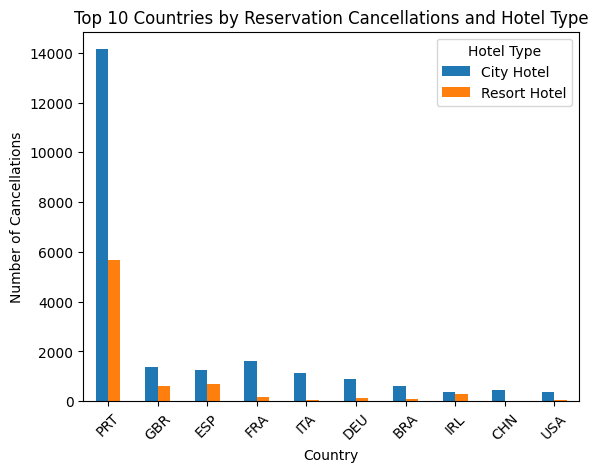

In [45]:
# soal 4.3
# Filter data untuk pembatalan
canceled_data = df[df['is_canceled'] == 1]

# Menghitung jumlah pembatalan per negara dan hotel
cancel_counts = canceled_data.groupby(['country', 'hotel']).size().unstack().fillna(0)

# Mengambil 10 negara dengan pembatalan tertinggi
top_countries = cancel_counts.sum(axis=1).nlargest(10).index
top_cancel_counts = cancel_counts.loc[top_countries]

# Plot data dalam bentuk stacked bar chart
top_cancel_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
plt.title("Top 10 Countries by Reservation Cancellations and Hotel Type")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.legend(title="Hotel Type")
plt.xticks(rotation=45)
plt.show()


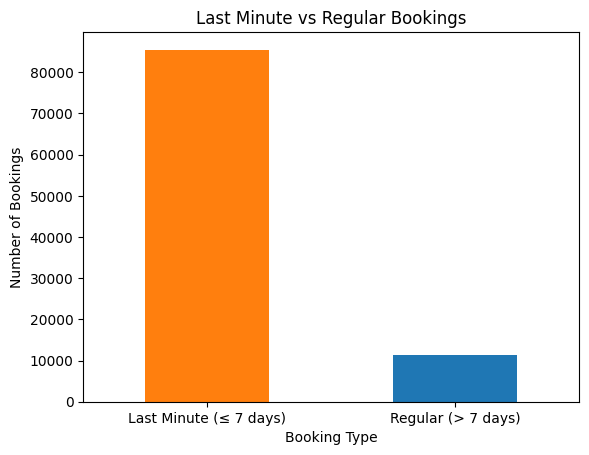

In [46]:
#4.4
# Definisikan last minute booking sebagai lead_time <= 7 hari
df['is_last_minute'] = df['lead_time'] <= 7

# Hitung jumlah pemesanan last minute dan non-last minute
last_minute_counts = df['is_last_minute'].value_counts()

# Mengatur Label dan Membuat Grafik Batang (Bar Chart)
last_minute_counts.index = ['Last Minute (≤ 7 days)', 'Regular (> 7 days)']
last_minute_counts.plot(kind='bar', color=['#ff7f0e', '#1f77b4'])

# Menambahkan Detail dan Menampilkan Grafik
plt.title("Last Minute vs Regular Bookings")
plt.xlabel("Booking Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

In [47]:
#A/B TESTING

# Pisahkan data menjadi dua grup berdasarkan jenis hotel
city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr']

# 1. Uji normalitas dengan Kolmogorov-Smirnov
city_normal_ks = stats.kstest(city_hotel_adr, 'norm').pvalue > 0.05
resort_normal_ks = stats.kstest(resort_hotel_adr, 'norm').pvalue > 0.05

# 2. Memilih uji statistik berdasarkan hasil uji normalitas
if city_normal_ks and resort_normal_ks:
    # Jika data berdistribusi normal, gunakan t-test
    t_stat, p_value = stats.ttest_ind(city_hotel_adr, resort_hotel_adr)
    test_used = "t-test"
else:
    # Jika data tidak normal, gunakan Mann-Whitney U test
    t_stat, p_value = stats.mannwhitneyu(city_hotel_adr, resort_hotel_adr)
    test_used = "Mann-Whitney U test"

# 3. Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Tolak H0: Ada perbedaan rata-rata adr antara City Hotel dan Resort Hotel.")
else:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Gagal menolak H0: Tidak ada perbedaan rata-rata adr yang signifikan antara City Hotel dan Resort Hotel.")

Hasil Mann-Whitney U test menunjukkan p-value = 0.0000. Tolak H0: Ada perbedaan rata-rata adr antara City Hotel dan Resort Hotel.


In [51]:
#Memeriksaa Anomali Dalam Dataset

# Menggunakan Isolation Forest pada semua kolom numerik dalam dataset
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df.select_dtypes(include=[np.number]))

# Anomali diberi label -1 oleh Isolation Forest
df['anomaly'] = df['anomaly'] == -1

print(df)


        Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0                0  Resort Hotel            0      342.0               2015   
1                1  Resort Hotel            0      737.0               2015   
2                2  Resort Hotel            0        7.0               2015   
3                3  Resort Hotel            0       13.0               2015   
4                4  Resort Hotel            0       69.0               2015   
...            ...           ...          ...        ...                ...   
119385      119385    City Hotel            0       23.0               2017   
119386      119386    City Hotel            0       69.0               2017   
119387      119387    City Hotel            0       69.0               2017   
119388      119388    City Hotel            0      109.0               2017   
119389      119389    City Hotel            0      205.0               2017   

       arrival_date_month  arrival_date_week_number

In [16]:
# Memeriksa Anomali Di Date Time
# Mengonversi kolom datetime menjadi format timestamp
df['timestamp'] = pd.to_datetime(df['arrival_date_day_of_month']).astype(np.int64) // 10**9

# Menggunakan Isolation Forest pada semua kolom numerik dalam dataset, termasuk timestamp
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(df.select_dtypes(include=[np.number]))

# Anomali diberi label -1 oleh Isolation Forest
df['anomaly'] = df['anomaly'] == -1

print(df)

        Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0                0  Resort Hotel            0      342.0               2015   
1                1  Resort Hotel            0      737.0               2015   
2                2  Resort Hotel            0        7.0               2015   
3                3  Resort Hotel            0       13.0               2015   
4                4  Resort Hotel            0       69.0               2015   
...            ...           ...          ...        ...                ...   
119385      119385    City Hotel            0       23.0               2017   
119386      119386    City Hotel            0       69.0               2017   
119387      119387    City Hotel            0       69.0               2017   
119388      119388    City Hotel            0      109.0               2017   
119389      119389    City Hotel            0      205.0               2017   

       arrival_date_month  arrival_date_week_number

In [52]:
# Menghapus baris yang terdeteksi sebagai anomali
df.drop(df[df['anomaly'] == True].index, inplace=True)

# Menghapus baris yang terdeteksi sebagai anomali dan melakukan reindexing
df = df.drop(df[df['anomaly'] == True].index).reset_index(drop=True)

print(df.drop)

# Menyimpan dataset yang telah dibersihkan kembali ke Google Drive
df.to_csv('/content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv', index=False)

print(f"Dataset yang sudah dibersihkan disimpan di: /content/drive/MyDrive/data_set_mid_term/cleaned_midterm_hotel_data.csv")

<bound method DataFrame.drop of         Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0                2  Resort Hotel            0        7.0               2015   
1                3  Resort Hotel            0       13.0               2015   
2                4  Resort Hotel            0       69.0               2015   
3                5  Resort Hotel            0       14.0               2015   
4                6  Resort Hotel            0       69.0               2015   
...            ...           ...          ...        ...                ...   
107446      119385    City Hotel            0       23.0               2017   
107447      119386    City Hotel            0       69.0               2017   
107448      119387    City Hotel            0       69.0               2017   
107449      119388    City Hotel            0      109.0               2017   
107450      119389    City Hotel            0      205.0               2017   

       arrival_date